In [5]:
import numpy as np
import scipy as sp
from scipy import linalg as lg
from scipy import integrate
from scipy.integrate import odeint
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
get_ipython().magic(u'matplotlib inline')

In [6]:
#Lanchester’s Combat models

In [7]:
#1.

b = [  1.83159466e-03   3.40805766e-03   3.72241341e-03   2.17931388e-05]
n = [ 0.48772114  0.9885056   0.83872029  0.11339925]
e = [ 0.97544227  1.9770112   1.67744057  0.2267985 ]
a = [ 0.24386057  0.4942528   0.41936014  0.05669962]


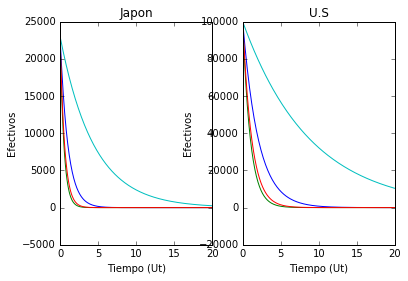

In [202]:
#Ecuacion diferencial asumiendo que Japon pierde con x = 1
#Los valores de n y b se consideran aleatorios

#Ecuacion
def L(ys,ts,b,n):
    
    #Coeficientes
    a = 0.5*b
    e = 2*n
    
    #Ecuaciones
    dldt = np.zeros(len(ys))
    dldt[0] = -a*ys[1] - e*ys[0]
    dldt[1] = -b*ys[0] - n*ys[1]
    
    return dldt

#Condiciones iniciales
ts = np.linspace(0,100,1000)
y0 = [23000.0,100000.0]

#Almacenamiento de los b y n
bs = []
ns = []

#Calculo de los b y n
for i in xrange(0,5):
    
    #Generacion aleatoria de los b y n
    random.seed()
    b = 0.01*random.random()
    n = random.random()
    
    #Solucion a la ecuacion diferencial con Odeint
    Sol = integrate.odeint(L,y0,ts,args=(b,n))
    
    #Condicion para que b y n permitan ganar en un rango de 2 a 20 Ut
    if (Sol[:,1][i])<76700.0 or Sol[:,0][i]<0.0 :break
    else:
        bs.append(b)
        ns.append(n)  
        
        ext=20
        #Grafico de la solucion
        plt.subplot(1,2,1)
        plt.plot(ts,Sol[:,0])
        plt.title('Japon')
        plt.xlabel('Tiempo (Ut)')
        plt.ylabel('Efectivos')
        plt.xlim(0,ext)
    
        plt.subplot(1,2,2)
        plt.plot(ts,Sol[:,1])
        plt.title('U.S')
        plt.xlabel('Tiempo (Ut)')
        plt.ylabel('Efectivos')
        plt.xlim(0,ext)
               
bs = np.array(bs)
ns = np.array(ns)

print 'b =',bs
print 'n =',ns
print 'e =',2*ns
print 'a =',0.5*ns

In [93]:
"""
En el grafico se muesta el comportamiento de la armada estadounidense
para diferentes valores de b y n cuando se supone que estos ganan 
(se supone que la armada japonesa pierde cuando queda sin efectivos)
Los valores de b y n se dan de manera aleatoria y para aquellos que hagan 
el numero de efectivos mayor a 76700 efectivos se clasifican para dar una
victoria entre 2 y 20 unidades de tiempo.
"""

'\nEn el grafico se muesta el comportamiento de la armada estadounidense\npara diferentes valores de b y n cuando se supone que estos ganan \n(se supone que la armada japonesa pierde cuando queda con un solo efectivo)\nLos valores de b y n se dan de manera aleatoria y para aquellos que hagan \nel numero de efectivos mayor a 76700 efectivos se clasifican para dar una\nvictoria entre 2 y 20 unidades de tiempo.\n'

In [70]:
#2.

In [336]:
#RK4
def RK4(f,y0,ts):
    
    #f es el conjunto de funciones acopladas y con argumentos de la forma f(y,t)
    #donde y es una lista de condiciones iniciales

    #Datos
    h = abs(ts[1]-ts[0])
    N = int(len(ts)/h)
    print 'Numero de iteraciones:', N
    
    t0 = ts[0]
    #y0 = np.array(y0)
    
    Sol = []
    
    for i in xrange(0,N):
        #Ks:
        k0 = f( y0             ,t0)
        k1 = f( y0 + 0.5*k0*h  ,t0 + 0.5*h)
        k2 = f( y0 + 0.5*k1*h  ,t0 + 0.5*h)
        k3 = f( y0 + k2*h      ,t0 + h)
        
        #Solucion
        y1 = y0 + h*(k0 + 2*k1 + 2*k2 + k3)/6.0
        Sol.append(y1)
        
        y0 = y1
        t0 = t0 + i*h

    return Sol

In [337]:
#3.

In [338]:
#Funciones a solucionar

#Coeficientes
b = bs[0]
a = 0.5*b
n = ns[0]
e = 2*n

def L(ys,ts):
    
    #Ecuaciones
    dldt = np.zeros(len(ys))
    dldt[0] = -a*ys[1] - e*ys[0]
    dldt[1] = -b*ys[0] - n*ys[1]
    
    return dldt

ts = np.linspace(0,10,100)
y0 = [23000.0,100000.0]
Sol = RK4(L,y0,ts)

Numero de iteraciones: 990


In [339]:
#4.

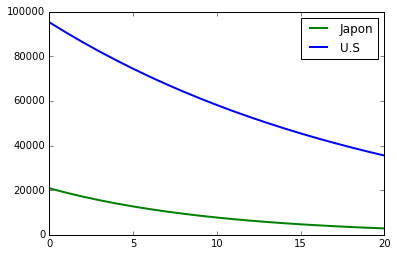

In [340]:
#Grafico

#Seleccionando los elementos para el grafico
J = []
U = []
for i in xrange(len(Sol)):
    if Sol[i][0]>0.0 or Sol[i][1]>23300.:
        J.append(Sol[i][0])
        U.append(Sol[i][1])

#Graficando
ext = 20
plt.plot(J,color="green", linewidth=2, label="Japon")
plt.plot(U,color="blue", linewidth=2, label="U.S")
plt.xlim(0,ext)
plt.legend()

In [341]:
#5.

In [342]:
#Funcion para el caso de una infiltracion de los japoneses.
c=0.5*b
def L2(ys,ts):
    
    #Ecuaciones
    dldt = np.zeros(len(ys))
    dldt[0] = -c*ys[1]*ys[1] - e*ys[0]
    dldt[1] = -b*ys[0] - n*ys[1]
    
    return dldt

In [343]:
Sol2 = RK4(L2,y0,ts)
Sol21 = integrate.odeint(L2,y0,ts)

Numero de iteraciones: 990


In [344]:
J2 = []
for i in xrange(len(Sol2)):
    J2.append(Sol2[i][0])

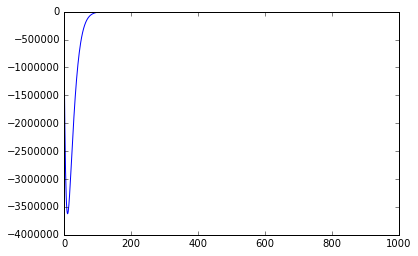

In [345]:
plt.plot(J2)